In [34]:
# import necessary packages
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from imutils import paths
import os
import glob
import cv2
import numpy as np
#from skimage import data, io, filters
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
from PIL import Image, ImageEnhance
#from keras.utils import np_utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

imagePaths = list(paths.list_images("/content/drive/MyDrive/data"))
print(imagePaths)

['/content/drive/MyDrive/data/Normal/dysgraphia_467_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_990_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1358_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_858_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_754_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_821_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_850_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1356_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_803_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1337_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1029_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_859_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_844_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_927_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_984_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1014_no.jpg', '/content/drive/MyDrive/data/Norma

In [6]:
#To read and preprocess image data
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(image)[1].split('_')[-1].split('.')[0]
    print(lable)
    lables.append(lable)
    
    img=Image.open(image)
   
    img=img.resize((256,256))
    enhancer = ImageEnhance.Sharpness(img.convert('RGB'))
    img=enhancer.enhance(10)
   
    img=np.array(img)
   # print(img.shape)
    data.append(img)
    c=c+1


no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 

In [7]:
# encode the labels as integer
data = np.array(data)
print(data.shape)
lables = np.array(lables)

(206, 256, 256, 3)


In [8]:
print(set(lables))

{'no', 'yes'}


In [9]:
le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

{0, 1}


In [185]:

#Splitting of dataset into training and test dataset
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.10, shuffle = True, random_state=42,stratify=lables)

trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)

print("X_train shape", trainX.shape)
print("y_train shape", trainY.shape)
print("X_test shape", testX.shape)
print("y_test shape", testY.shape)


X_train shape (185, 256, 256, 3)
y_train shape (185, 1)
X_test shape (21, 256, 256, 3)
y_test shape (21, 1)


In [186]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder()
trainY= label.fit_transform(trainY)
testY= label.fit_transform(testY)
# valY= label.fit_transform(valY)
print(testY)

[1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


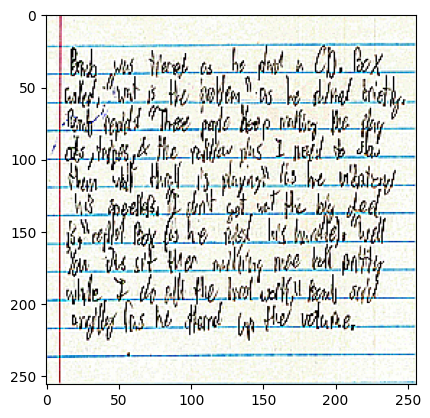

In [187]:
plt.imshow(trainX[126,:])
plt.show()

**VGG16 Model**


**Data Augmentation**

In [188]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
# data augmentation
datagen = ImageDataGenerator(

        zca_whitening=False,  # dimesion reduction
        #rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        #horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(trainX)



# datagen.fit(valX)

**Transfer Learning using VGG16 (Imagenet)**

In [189]:

model_3 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(256, 256, 3)),
    MaxPool2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Dropout(0.5),
   
    Flatten(),
  
    Dense(512,activation='LeakyReLU'),
    Dense(128,activation='relu'),
    Dense(64,activation='LeakyReLU'),
    Dense(32,activation='relu'),
    Dense(8,activation='LeakyReLU'),
    Dense(1,activation='sigmoid')

])

In [190]:
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 flatten_17 (Flatten)        (None, 131072)          

In [191]:
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
#from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.optimizers import SGD
opt = Adam(lr=0.0002)
model_3.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [192]:
history_VGG=model_3.fit(
   datagen.flow(trainX,trainY, batch_size=32),
                              epochs = 30

)

Epoch 1/30
6/6 [==============================] - 61s 286ms/step - loss: 180.1683 - accuracy: 0.4541
Epoch 2/30
6/6 [==============================] - 3s 422ms/step - loss: 10.8528 - accuracy: 0.5405
Epoch 3/30
6/6 [==============================] - 2s 399ms/step - loss: 0.8283 - accuracy: 0.5514
Epoch 4/30
6/6 [==============================] - 4s 622ms/step - loss: 0.6776 - accuracy: 0.5730
Epoch 5/30
6/6 [==============================] - 3s 407ms/step - loss: 0.6312 - accuracy: 0.6486
Epoch 6/30
6/6 [==============================] - 3s 426ms/step - loss: 0.5933 - accuracy: 0.6811
Epoch 7/30
6/6 [==============================] - 3s 406ms/step - loss: 0.5379 - accuracy: 0.7189
Epoch 8/30
6/6 [==============================] - 3s 598ms/step - loss: 0.5078 - accuracy: 0.6973
Epoch 9/30
6/6 [==============================] - 3s 411ms/step - loss: 0.4794 - accuracy: 0.7459
Epoch 10/30
6/6 [==============================] - 3s 409ms/step - loss: 0.6360 - accuracy: 0.6865
Epoch 11/30
6/6

In [193]:

acc = history_VGG.history['accuracy']


loss = history_VGG.history['loss']


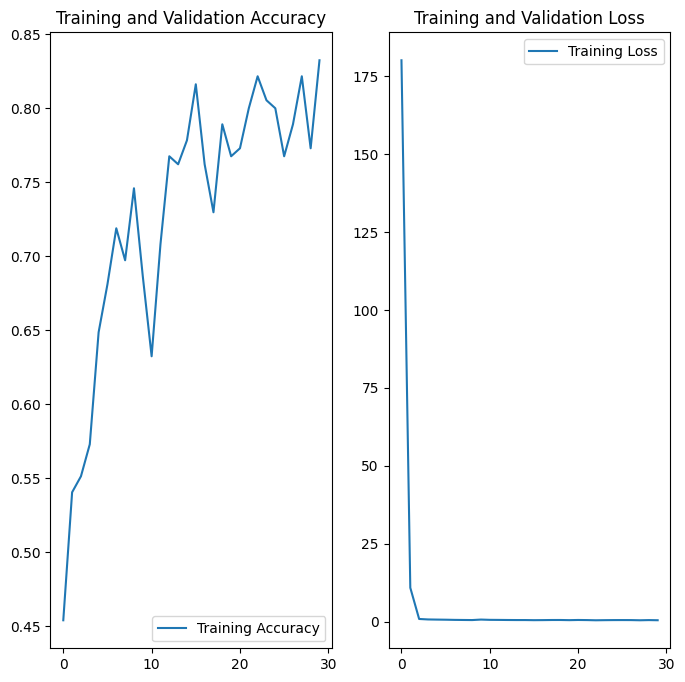

In [195]:
EPOCHS=30
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

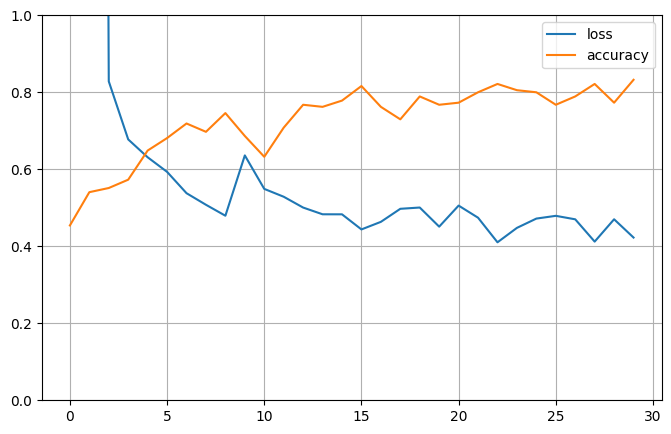

In [196]:
import pandas as pd
pd.DataFrame(history_VGG.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [197]:
scores = model_3.evaluate(testX, testY)
print(scores)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 169ms/step - loss: 0.5973 - accuracy: 0.9048
[0.5973330736160278, 0.9047619104385376]

Accuracy: 90.48%


In [198]:
def evaluvate(model,x,y):
    y_predict=model.predict(x)
    y_predict=y_predict>0.5
    # print(y_predict)
    print(classification_report(y,y_predict))
    ConfusionMatrixDisplay.from_predictions(y,y_predict)

1/1 [==============================] - 0s 94ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.90      0.90      0.90        10

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



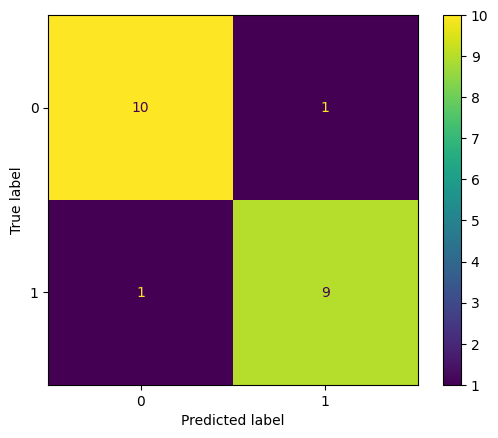

In [199]:
evaluvate(model_3,testX,testY)

In [200]:
import pickle

pickle.dump(model_3,open('Simple_conv_lr2.pkl','wb'))